In [3]:
from PIL import Image
import PIL
import numpy as np

In [4]:
path = "CelebAMask-HQ/CelebA-HQ-img/"
image_url = path + "0.jpg"

In [5]:
path_mask = "CelebAMask-HQ/CelebAMask-HQ-mask-anno/"
image_mask_url = path_mask + "0/00000_skin.png"

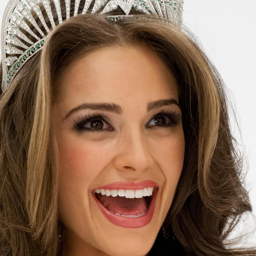

In [6]:
face = Image.open(image_url).resize((256,256))
face

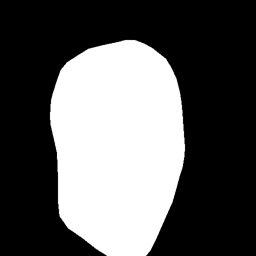

In [7]:
mask = Image.open(image_mask_url).resize((256,256))
mask

In [8]:
binary_mask = (np.array(mask)[:,:,0:1] / 255.0).astype(np.int64)

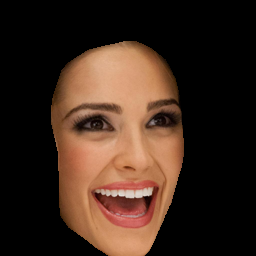

In [9]:
Image.fromarray( np.uint8( binary_mask * face))

In [10]:
### creating dataset

In [11]:
from glob import glob
import shutil
def get_images_from_path(path):
    images_list_jpeg = glob(path+"*/*.jpeg", recursive = True)
    images_list_jpg = glob(path+"*/*.jpg", recursive = True)
    images_list_png = glob(path+"*/*.png", recursive = True)
    return images_list_jpeg + images_list_jpg + images_list_png

In [12]:
!rm -r face_dataset
!mkdir face_dataset
!mkdir face_dataset/images
!mkdir face_dataset/gif

rm: cannot remove 'face_dataset': No such file or directory


In [13]:
images_list = glob(path+"*.jpg", recursive = True)
for im in images_list:
    dst = "face_dataset/images/" + im.split("/")[-1]
    Image.open(im).resize((256,256)).save(dst)
    #shutil.copyfile(im, dst)

In [14]:
mask_images_list = get_images_from_path(path_mask)

In [15]:
mask_filtered_images = list(filter(lambda x: "skin" in x, mask_images_list))

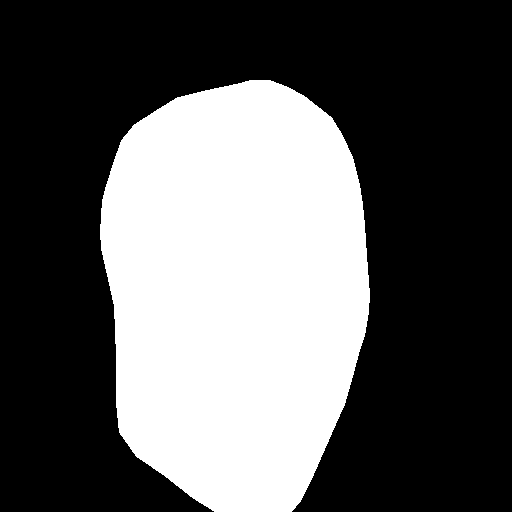

In [16]:
Image.open(image_mask_url)

In [17]:
!pip install tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 634.8 kB/s eta 0:00:001m853.1 kB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 1.8 MB/s eta 0:00:003.6 MB/s eta 0:00:01


In [18]:
from tqdm import tqdm

In [19]:
def get_name(uri):
    a = uri.split("/")[-1]
    idx = int(a.split("_")[0])
    return str(idx)+".gif"

for img in tqdm(mask_filtered_images):
    img_ = Image.open(img).resize((256,256), resample = PIL.Image.NEAREST)
    binary_mask = (np.array(img_)[:,:,0:1] / 255.0).astype(np.int64) * 255.
    final_mask = np.concatenate([binary_mask,binary_mask,binary_mask],axis = 2)
    Image.fromarray( np.uint8( final_mask)).save("face_dataset/gif/"+get_name(img))

100%|████████████████████████████████████| 30000/30000 [02:03<00:00, 241.98it/s]
